## Setup

In [1]:
# Data
import numpy as np
import pandas as pd 

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Stats 
import statsmodels.api as sm

In [2]:
# plot style set 
plt.style.use('ggplot')

## EDA analysis (I) - Basic

In [3]:
# Load the saved clean data 
apple = pd.read_csv(r'C:\Users\12436\Desktop\BrainStation\Capstone project\capstone-Leoyuyuyu\data\apple_stock_clean.csv', index_col=[0])
apple.head()

Open      High       Low     Close  Adj Close       Volume  \
1980-12-13  0.128348  0.128906  0.128348  0.128348   0.099058  469033600.0   
1980-12-14  0.128348  0.128906  0.128348  0.128348   0.099058  469033600.0   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093890  175884800.0   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086998  105728000.0   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089152   86441600.0   

              Return  
1980-12-13  0.000000  
1980-12-14  0.000000  
1980-12-15 -0.052171  
1980-12-16 -0.073398  
1980-12-17  0.024751

In [4]:
# Change the index to datetime 
apple.index = pd.to_datetime(apple.index)
apple.index

DatetimeIndex(['1980-12-13', '1980-12-14', '1980-12-15', '1980-12-16',
               '1980-12-17', '1980-12-18', '1980-12-19', '1980-12-20',
               '1980-12-21', '1980-12-22',
               ...
               '2024-05-14', '2024-05-15', '2024-05-16', '2024-05-17',
               '2024-05-18', '2024-05-19', '2024-05-20', '2024-05-21',
               '2024-05-22', '2024-05-23'],
              dtype='datetime64[ns]', length=15868, freq=None)

### Variable visualization -- data distribution

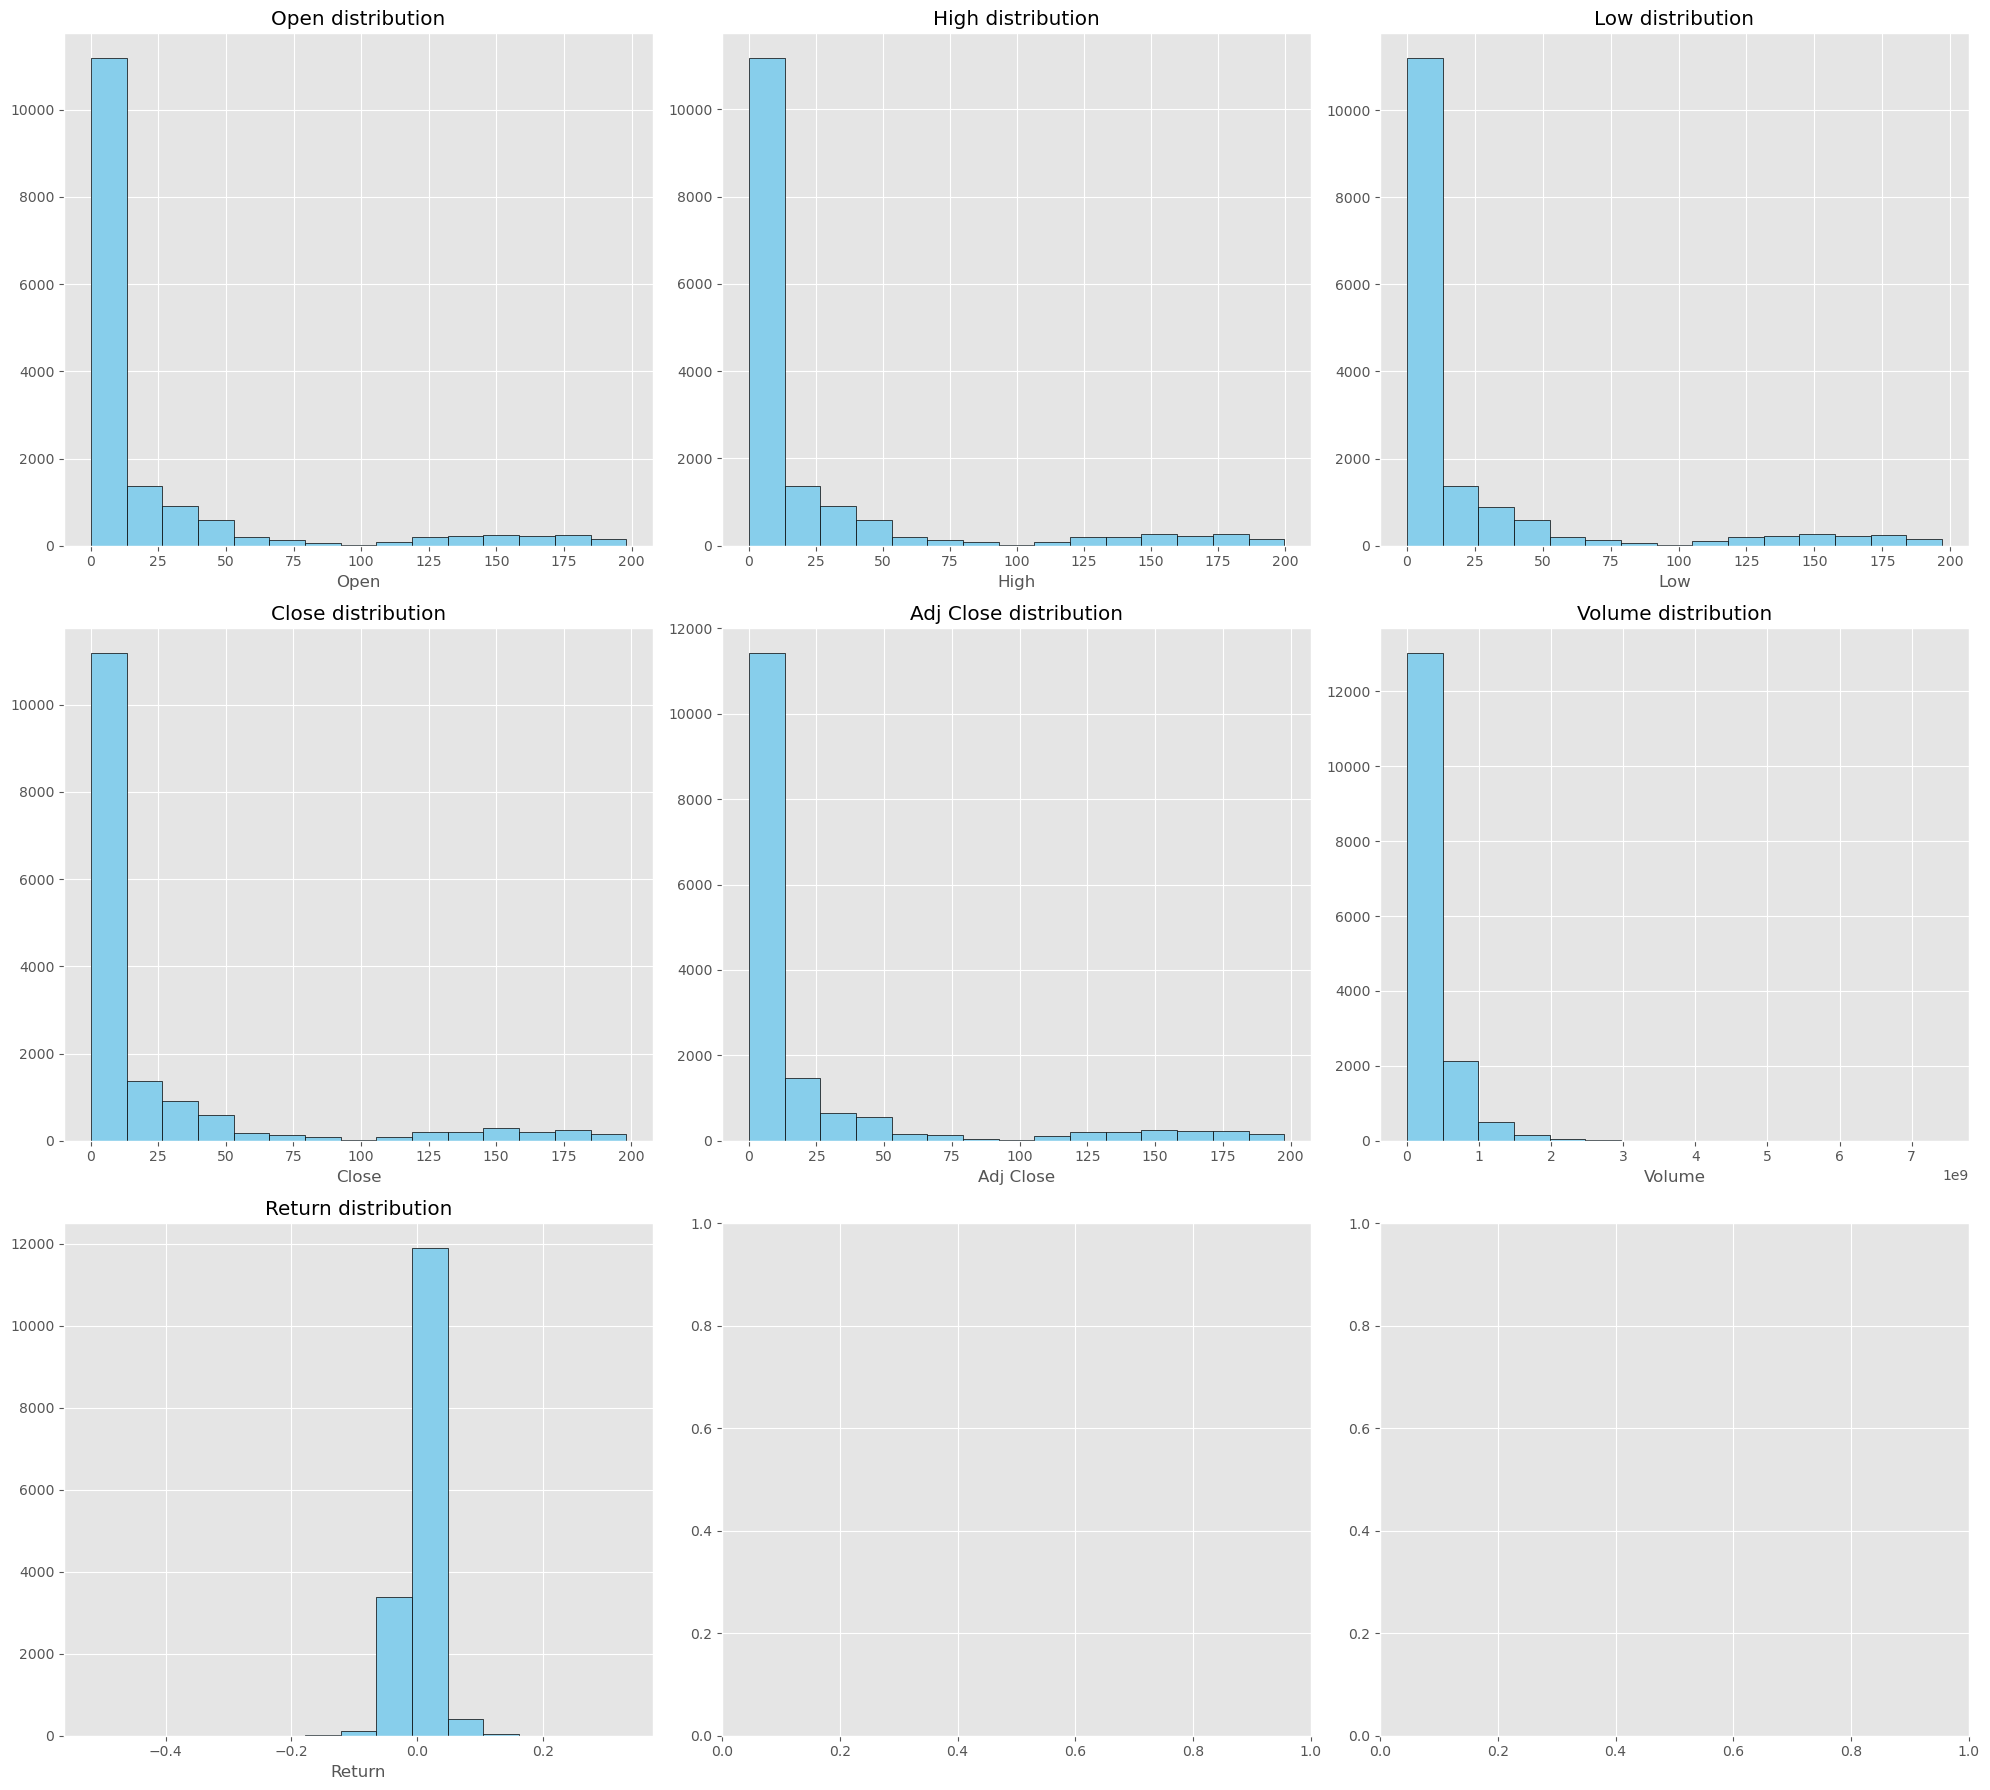

In [10]:
# Visualization of the data distribution
columns = list(apple.columns)
plt.subplots(3,3, figsize = (20,18))

for fig_id, cols in enumerate(columns, 1):
    plt.subplot(3,3,fig_id)
    plt.hist(x = apple[cols], bins = 15, edgecolor = 'black', color='skyblue')
    plt.title(f'{cols} distribution')
    plt.xlabel(f'{cols}')
    
plt.tight_layout()
plt.show()



###  Variable visualization-time series 

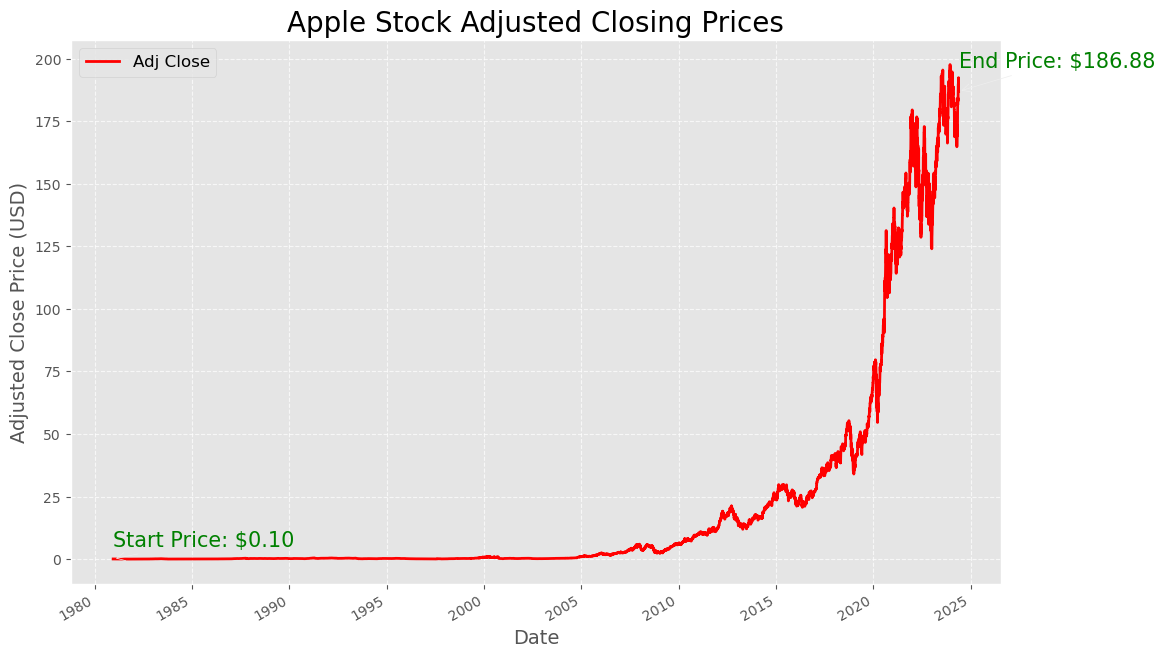

In [11]:
# plot a beautiful figure 

plt.figure(figsize=(12, 8))
plt.plot(apple.index, apple['Adj Close'], color='red', linestyle='-', linewidth=2)
plt.title('Apple Stock Adjusted Closing Prices', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price (USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['Adj Close'], loc='best', fontsize=12)


# Annotating the start and end prices
start_price = apple['Adj Close'].iloc[0]
end_price = apple['Adj Close'].iloc[-1]
start_date = apple.index[0]
end_date = apple.index[-1]

plt.annotate(f'Start Price: ${start_price:.2f}', xy=(start_date, start_price), xytext=(start_date, start_price + (start_price*50)),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=15, color='green')

plt.annotate(f'End Price: ${end_price:.2f}', xy=(end_date, end_price), xytext=(end_date, end_price + (end_price*0.05)),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=15, color='green')


plt.gcf().autofmt_xdate()
plt.show()

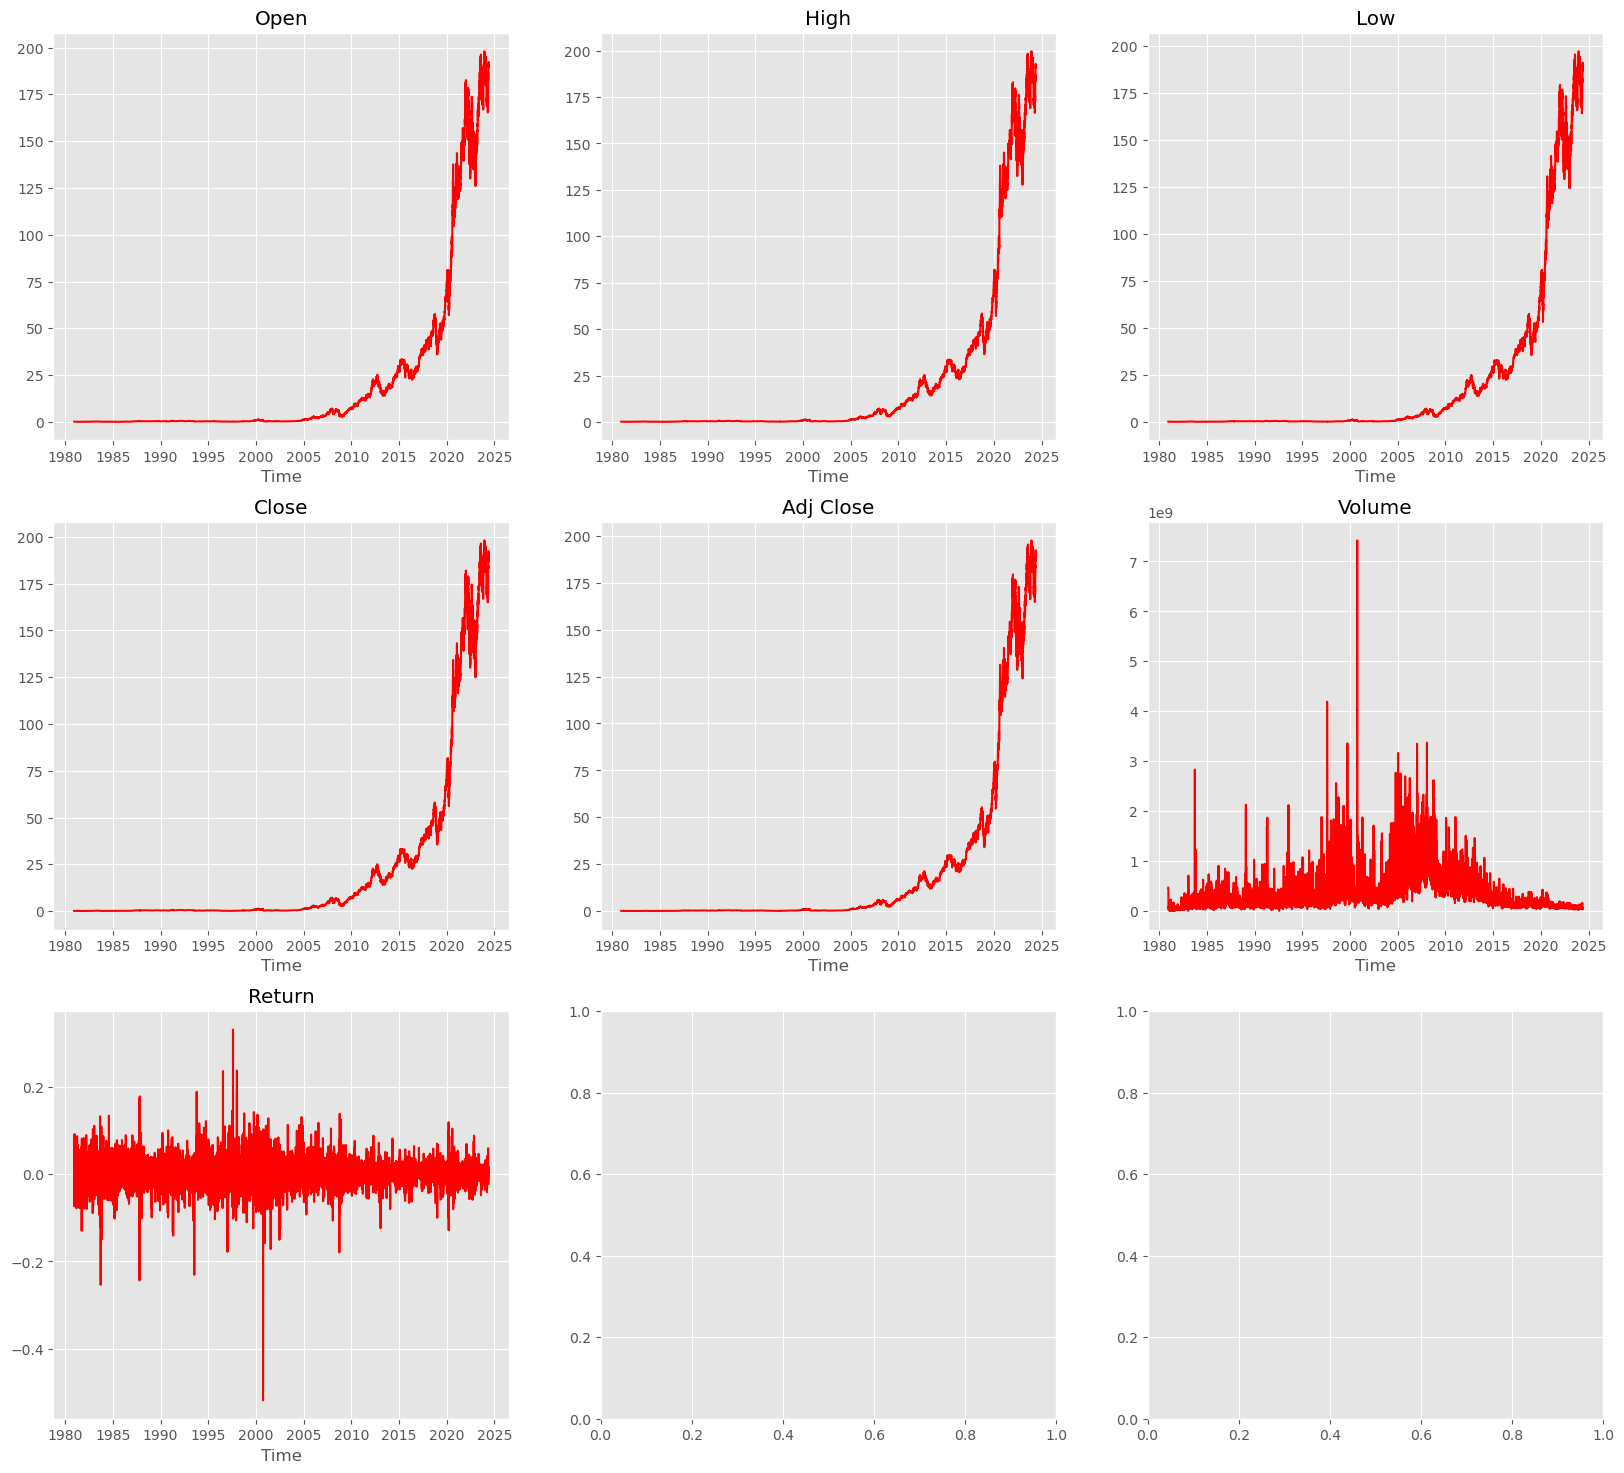

In [13]:
plt.subplots(3,3, figsize = (20,18))

for fig_id, cols in enumerate(columns, 1):
    plt.subplot(3,3,fig_id)
    plt.plot(apple.index, apple[cols], color = 'red')
    plt.title(f'{cols}')
    plt.xlabel('Time')


###  Target adding: positive return

In [14]:
apple['Target'] = np.where(apple['Return']>0, 1, 0)  # We should note here that if the price keep the same, there is no point for us to buy and sell the stock. 
apple['Target'].value_counts()

Target
0    10421
1     5447
Name: count, dtype: int64

In [15]:
# Save the processed data as a new file.
# apple.to_csv(r'C:\Users\12436\Desktop\BrainStation\Capstone project\capstone-Leoyuyuyu\data\apple_after_eda.csv')

### Time series EDA 

A fundamental step in time series EDA is the trend-seasonal decomposition. Here, we extract three series from our original observation: 
- a trend component $T_t$ calculated using a moving average,
- a seasonal component $S_t$ which is the monthly/daily average of the de-trended series, and
- the residual $R_t$ that remains after subtracting the trend and seasonal component from the original series.

Adding up these three components will give back the original series:

$$y_t = T_t + S_t + R_t$$

There are different approaches for computing the trend and seasonal components, but the most standard method is implemented by the `seasonal_decompose` function from the time series analysis module of `statsmodels`. 

**Note**: In order to do this, we must have the date index so that the decomposition can infer the seasonality.

The null values are due the fact that the trend component is calculated with a rolling average that is not defined at the beginning and end of the series.

In [21]:
# decompose the time series
decomposition = tsa.seasonal_decompose(apple[['Adj Close']], model='additive', period=252)

# add the decomposition data to the apple data

apple["Trend"] = decomposition.trend
apple["Seasonal"] = decomposition.seasonal
apple["Residual"] = decomposition.resid

apple.head(10)

Open      High       Low     Close  Adj Close       Volume  \
1980-12-13  0.128348  0.128906  0.128348  0.128348   0.099058  469033600.0   
1980-12-14  0.128348  0.128906  0.128348  0.128348   0.099058  469033600.0   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093890  175884800.0   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086998  105728000.0   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089152   86441600.0   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091737   73449600.0   
1980-12-19  0.126116  0.126674  0.126116  0.126116   0.097335   48630400.0   
1980-12-20  0.126116  0.126674  0.126116  0.126116   0.097335   48630400.0   
1980-12-21  0.126116  0.126674  0.126116  0.126116   0.097335   48630400.0   
1980-12-22  0.132254  0.132813  0.132254  0.132254   0.102072   37363200.0   

              Return  Target  Trend  Seasonal  Residual  
1980-12-13  0.000000       0    NaN -0.708903       NaN  
1980-12-14  0.000000       0    NaN -0.721181       NaN  
1980-12-15 -0.052171       0    NaN -0.726196       NaN  
1980-12-16 -0.073398       0    NaN -0.672802       NaN  
1980-12-17  0.024751       1    NaN -0.822246       NaN  
1980-12-18  0.028992       1    NaN -0.832904       NaN  
1980-12-19  0.061029       1    NaN -0.744794       NaN  
1980-12-20  0.000000       0    NaN -0.756651       NaN  
1980-12-21  0.000000       0    NaN -0.768509       NaN  
1980-12-22  0.048670       1    NaN -0.599876       NaN

In [20]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

cols = ['Adj Close', "Trend", "Seasonal", "Residual"]

fig = make_subplots(rows=4, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=apple.index, y=apple[col]),
        row=i+1,
        col=1
    )
    
fig.update_layout(height=1200, width=1200, showlegend=False)
fig.update_xaxes(rangeslider_visible=True, rangeslider_thickness=0.02)
fig.show()

##  EDA(II) - Advanced

To analyse the data more precisely, we only use the data after 2010 as the stock price and the company situation has changed a lot and using the data after 2010 is more representative. 

In [22]:
apple.head()

Open      High       Low     Close  Adj Close       Volume  \
1980-12-13  0.128348  0.128906  0.128348  0.128348   0.099058  469033600.0   
1980-12-14  0.128348  0.128906  0.128348  0.128348   0.099058  469033600.0   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093890  175884800.0   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086998  105728000.0   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089152   86441600.0   

              Return  Target  Trend  Seasonal  Residual  
1980-12-13  0.000000       0    NaN -0.708903       NaN  
1980-12-14  0.000000       0    NaN -0.721181       NaN  
1980-12-15 -0.052171       0    NaN -0.726196       NaN  
1980-12-16 -0.073398       0    NaN -0.672802       NaN  
1980-12-17  0.024751       1    NaN -0.822246       NaN

In [24]:
apple_copy = apple[apple.index > '2010-01-03']

In [31]:
apple_copy.shape

(5254, 11)

Now we visualize the trend of the adj Close.

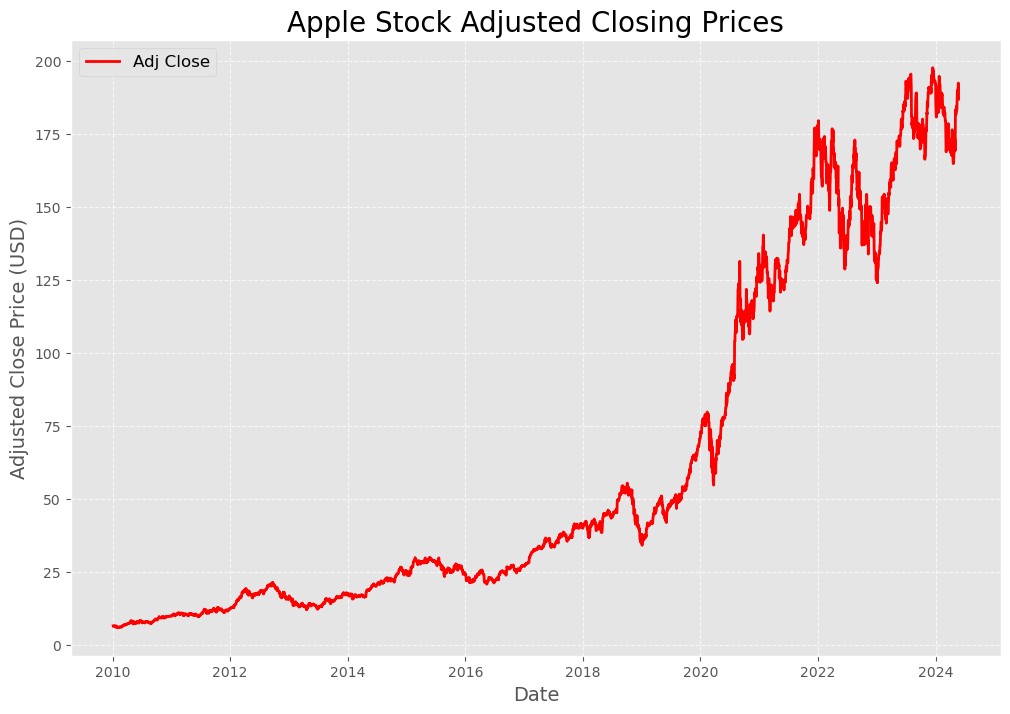

In [30]:
# plot a beautiful figure 

plt.figure(figsize=(12, 8))
plt.plot(apple_copy.index, apple_copy['Adj Close'], color='red', linestyle='-', linewidth=2)
plt.title('Apple Stock Adjusted Closing Prices', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price (USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['Adj Close'], loc='best', fontsize=12)
plt.show()

In [37]:
# decompose the time series
decomposition = tsa.seasonal_decompose(apple_copy[['Adj Close']], model='additive', period=252)

# add the decomposition data to the apple data

apple_copy["Trend"] = decomposition.trend
apple_copy["Seasonal"] = decomposition.seasonal
apple_copy["Residual"] = decomposition.resid

apple_copy.head()

C:\Users\12436\AppData\Local\Temp\ipykernel_6968\738629231.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\12436\AppData\Local\Temp\ipykernel_6968\738629231.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\12436\AppData\Local\Temp\ipykernel_6968\738629231.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Open      High       Low     Close  Adj Close       Volume  \
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.461977  493729600.0   
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.473148  601904800.0   
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.370184  552160000.0   
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.358408  477131200.0   
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.400683  447610800.0   

              Return  Target  Trend  Seasonal  Residual  
2010-01-04  0.015565       1    NaN -2.433615       NaN  
2010-01-05  0.001729       1    NaN -2.535760       NaN  
2010-01-06 -0.015906       0    NaN -2.244809       NaN  
2010-01-07 -0.001849       0    NaN -2.722036       NaN  
2010-01-08  0.006649       1    NaN -2.911177       NaN

In [38]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

cols = ['Adj Close', "Trend", "Seasonal", "Residual"]

fig = make_subplots(rows=4, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=apple_copy.index, y=apple_copy[col]),
        row=i+1,
        col=1
    )
    
fig.update_layout(height=1200, width=1200, showlegend=False)
fig.update_xaxes(rangeslider_visible=True, rangeslider_thickness=0.02)
fig.show()

## EDA(III) 

Based on the stock price we want to investigate that whether the price data is stationary. In the first step, we difference the data by 1 unit, i.e., 1 day in this data set. This differencing has been included in the former process to generate the return. 

In [39]:
apple_copy.head()

Open      High       Low     Close  Adj Close       Volume  \
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.461977  493729600.0   
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.473148  601904800.0   
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.370184  552160000.0   
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.358408  477131200.0   
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.400683  447610800.0   

              Return  Target  Trend  Seasonal  Residual  
2010-01-04  0.015565       1    NaN -2.433615       NaN  
2010-01-05  0.001729       1    NaN -2.535760       NaN  
2010-01-06 -0.015906       0    NaN -2.244809       NaN  
2010-01-07 -0.001849       0    NaN -2.722036       NaN  
2010-01-08  0.006649       1    NaN -2.911177       NaN

In [42]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(apple_copy['Return'])

# Extract and print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -15.908815100297947
p-value: 8.168305311934927e-29


 As we can see above, after the adfuller hypothesis test, the p_value is smaller that 0.05, which means that we have enough evidence to reject the null hypothesis and agree that the series is stationary. We plot the return data in the figrue below.

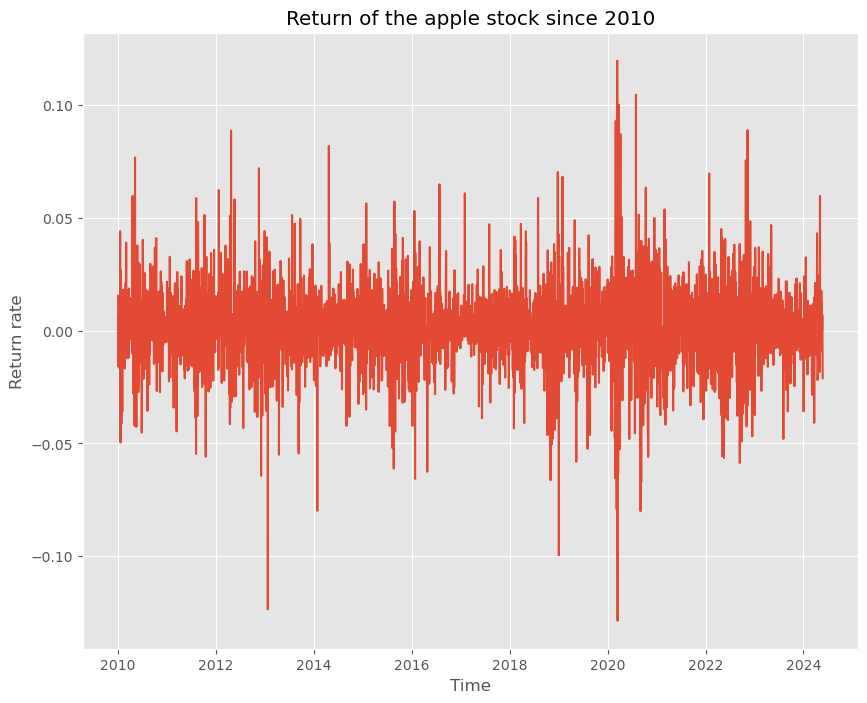

In [45]:
plt.figure(figsize = (10,8))
plt.plot(apple_copy.index, apple_copy['Return'])
plt.title('Return of the apple stock since 2010')
plt.xlabel('Time')
plt.ylabel('Return rate')
plt.show()


As we can see that the return data looks messy in the above plot, we firstly again check the distribution of the return value since 2010.

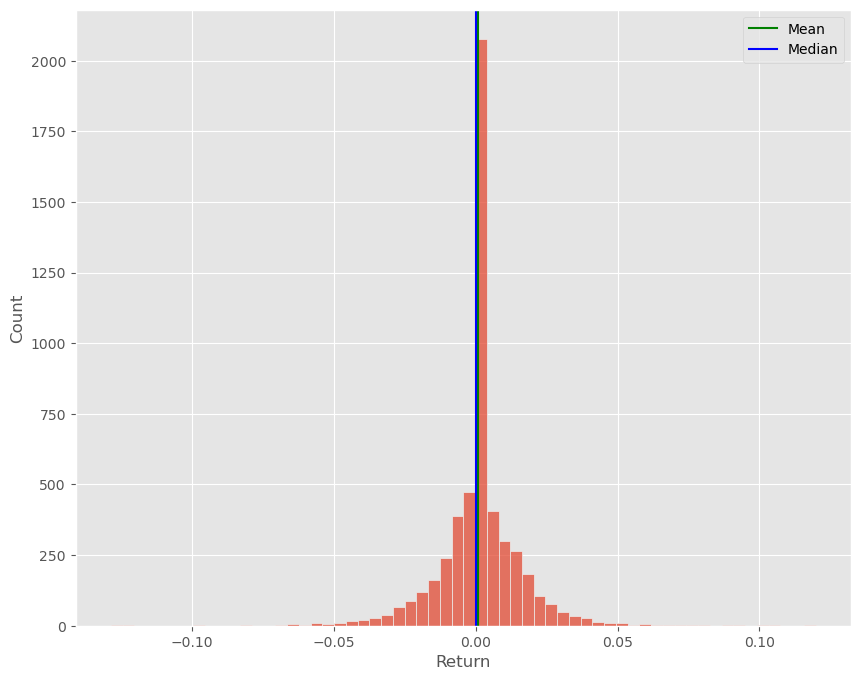

In [59]:
plt.figure(figsize = (10,8))
sns.histplot(apple_copy['Return'], bins=60)
plt.axvline(x= apple_copy['Return'].mean(), c= 'green', label = 'Mean')
plt.axvline(x= apple_copy['Return'].median(), c= 'blue', label = 'Median')
plt.legend()
plt.show()

It looks like a normal distribution and we can quote a Shapiro-Wilk Test and employ a qq-plot to check the distribution of this column of data.

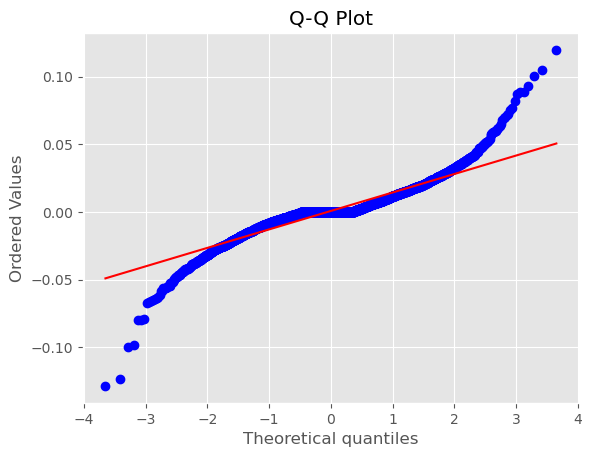

In [49]:
import scipy.stats as stats
# Q-Q plot
stats.probplot(apple_copy['Return'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [51]:
from scipy.stats import shapiro

stat, p = shapiro(apple_copy['Return'])
print('Shapiro-Wilk Test Statistic:', stat)
print('p-value:', p)
if p > 0.05:
    print("Sample looks Gaussian (fail to reject H0), take H0")
else:
    print("Sample does not look Gaussian (reject H0), take H1")

Shapiro-Wilk Test Statistic: 0.8657777905464172
p-value: 0.0
Sample does not look Gaussian (reject H0), take H1


In [56]:
apple_copy['Return'].describe()

count    5254.000000
mean        0.000751
std         0.014688
min        -0.128647
25%        -0.003417
50%         0.000000
75%         0.005898
max         0.119808
Name: Return, dtype: float64